<a href="https://colab.research.google.com/github/sidhu2690/IDC-410/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Generate Data

#####Without Theta

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_binary_dataset(n, m):
    beta = np.random.normal(size=(m + 1, 1))
    X = np.hstack([np.ones((n, 1)), np.random.normal(size=(n, m))])

    p = 1 / (1 + np.exp(-X.dot(beta)))
    Y = (p > 0.5).astype(int)
    return X, Y

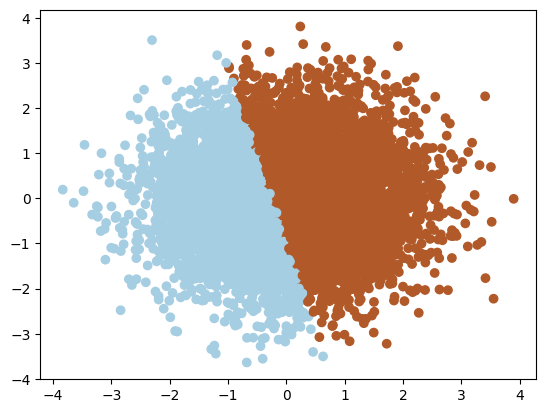

In [11]:
X, Y = generate_binary_dataset(10000,2)
plt.scatter(X[:, 1], X[:, 2], c=Y.flatten(), cmap=plt.cm.Paired)

#####With Theta

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n, m, theta):
    beta = np.random.normal(size=(m + 1, 1))
    X = np.hstack([np.ones((n, 1)), np.random.normal(size=(n, m))])
    noise = np.random.binomial(1, theta, size=(n, 1))
    p = 1 / (1 + np.exp(-X.dot(beta)))
    Y = (p > 0.5).astype(int)
    Z = Y^noise
    return X, Y, Z

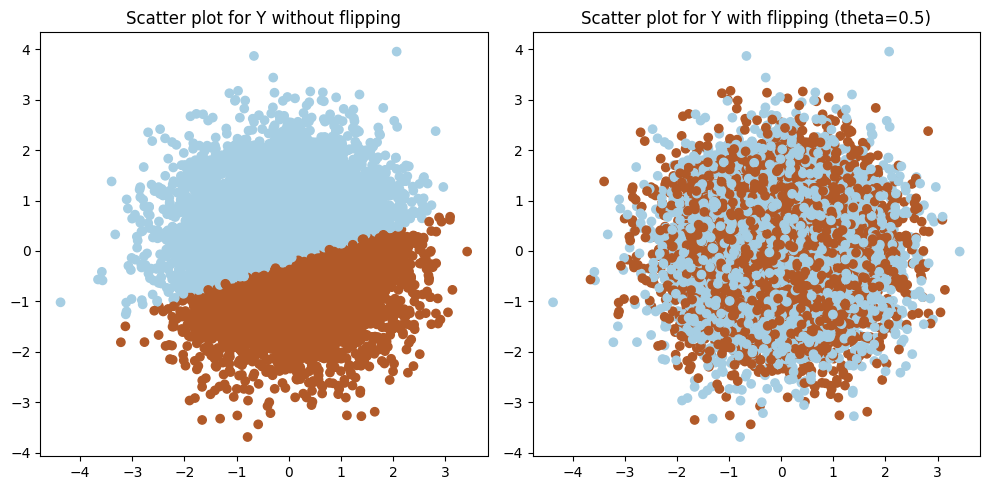

In [25]:
n,m,theta=10000,2,0.5
X, Y,Z= generate_data(n,m,theta)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(X[:, 1], X[:, 2], c=Y.flatten(), cmap=plt.cm.Paired, label='Y')
axs[0].set_title('Scatter plot for Y without flipping')
axs[1].scatter(X[:, 1], X[:, 2], c=Z.flatten(), cmap=plt.cm.Paired, label='Z')
axs[1].set_title(f"Scatter plot for Y with flipping (theta={theta})")
plt.tight_layout()
plt.show()

###Logisitic regression

In [37]:
def logistic_regression(X, Y, k, tau, lr):
    n, m = X.shape
    beta = np.random.normal(size=(m, 1))
    prev_cost = np.inf
    for i in range(k):
        p = 1 / (1 + np.exp(-X.dot(beta)))
        cost = -np.sum(Y*np.log(p) + (1-Y)*np.log(1-p))

        grad = X.T.dot(p - Y)
        beta -= lr * grad

        if np.linalg.norm(grad) < tau:
            break

        if np.abs(prev_cost - cost) < tau:
            break

        prev_cost = cost

    return beta, cost

In [41]:
X, Y, _ = generate_data(n=100, m=2, theta=0)
beta, _ = logistic_regression(X, Y, k=1000, tau=1e-5, lr=0.001)

p_pred = 1 / (1 + np.exp(-X.dot(beta)))

Y_pred = (p_pred > 0.5).astype(int)

#Visualizing the result

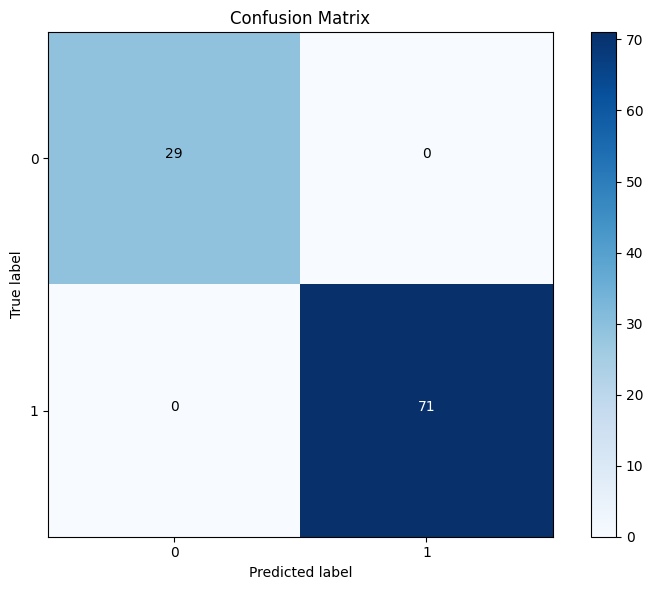

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y, Y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['0', '1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()